In [41]:
#Importing libraries required
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

# Data Preprocessing

# Processing Training Dataset

In [2]:
#Reading the train dataset
df=pd.read_csv('au_train.csv',sep=',',na_values='?',skipinitialspace=True)
display(df.head(30))
display(df.describe())
display(df.dtypes)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object

In [3]:
#Total number of missing values
print(df.isnull().sum())

#Percentage of missing values
perofmissing = (df.isnull().sum()/len(df))*100
print('Percentage of missing values \n',perofmissing)

#Dropping Nan values

df=df.dropna()
print(len(df))

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
class                0
dtype: int64
Percentage of missing values 
 age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.790486
class             0.000000
dtype: float64
30162


# Encoding Catergorical Data - Training Dataset

In [5]:
class_feature= df['class']
training_features= df.drop('class', axis=1)


#Due to multiple categorical features in the data, onehotencoder is used to encode these labels
categorical_data= training_features.dtypes[training_features.dtypes=='object'].index.tolist()
ohe= OneHotEncoder(handle_unknown="ignore", sparse=False)
train_data= ohe.fit_transform(training_features.loc[:,categorical_data])


categorical_index= [training_features.columns.get_loc(col) for col in categorical_data]
#print(categorical_index)
categorical_columns= training_features.columns.get_values()[categorical_index].tolist()
#print(categorical_columns)
categorical_data_names= ohe.get_feature_names(categorical_columns)
#print(categorical_data_names)

categorical_data_df= pd.DataFrame(train_data, columns=categorical_data_names)

#Encoding dependent variable
le= LabelEncoder()
dep_var_train= le.fit_transform(class_feature)
dep_var_train= pd.DataFrame(dep_var_train, columns=['class'])

dep_var_train.head(10)

,class
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,1
8,1
9,1


# Scaling Numerical Data and Concatenating to form complete Train Data Set

In [6]:
#Remainder features
numerical_columns= df.dtypes[df.dtypes == 'int64'].index

#feature scaling
sc = StandardScaler()
numerical_data = pd.DataFrame(data = training_features[numerical_columns])
numerical_data[numerical_columns] = sc.fit_transform(training_features[numerical_columns])

numerical_data_df= numerical_data.reset_index()

# Concatenation
indep_var_train= pd.merge(numerical_data_df, categorical_data_df, left_index=True, right_index=True)
indep_var_train=indep_var_train.drop('index',axis=1)
indep_var_train.head()


C:\Users\madhu\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\madhu\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.042796,-1.062722,1.128918,0.146092,-0.218586,-0.077734,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.880288,-1.007871,1.128918,-0.147445,-0.218586,-2.331531,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.033340,0.244693,-0.439738,-0.147445,-0.218586,-0.077734,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.108695,0.425240,-1.224066,-0.147445,-0.218586,-0.077734,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.794697,1.406658,1.128918,-0.147445,-0.218586,-0.077734,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Processing Test Dataset

In [7]:
#Reading the test dataset
test_df= pd.read_csv('au_test.csv',sep=',',na_values='?',skipinitialspace=True)
test_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


In [8]:
#Total number of missing values
print(test_df.isnull().sum())

#Percentage of missing values
perofmissingtest= (test_df.isnull().sum()/len(df))*100
print('Percentage of missing values \n',perofmissingtest)

#Dropping Nan values
test_df= test_df.dropna()
print(len(test_df))

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
class               0
dtype: int64
Percentage of missing values 
 age               0.000000
workclass         3.192759
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        3.202705
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    0.908428
class             0.000000
dtype: float64
15060


# Encoding Catergorical Data - Testing Dataset

In [9]:
#Repeating for test dataset
test_class_feature= test_df['class']
testing_features= test_df.drop('class', axis=1)
display(testing_features.head())
#Using the object 'ohe' 
test_data= ohe.transform(testing_features.loc[:,categorical_data])

categorical_data_df_test= pd.DataFrame(test_data, columns=categorical_data_names)
print(categorical_data_df_test.shape)
#Encoding dependent variable
le= LabelEncoder()
dep_var_test= le.fit_transform(test_class_feature)
dep_var_test= pd.DataFrame(dep_var_test, columns=['class'])
dep_var_test.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States


(15060, 98)


,class
0,0
1,0
2,1
3,1
4,0
5,1
6,0
7,0
8,1
9,0


# Scaling Numerical Data and Concatenating to form complete Test Data Set

In [10]:

#Remainder Features
numerical_data_test = pd.DataFrame(data = testing_features[numerical_columns])
numerical_data_test[numerical_columns] = sc.transform(testing_features[numerical_columns])
numerical_data_df_test= numerical_data_test.reset_index()

# Concatenation
indep_var_test= pd.merge(numerical_data_df_test, categorical_data_df_test, left_index= True, right_index= True)
indep_var_test= indep_var_test.drop('index', axis= 1)
display(indep_var_test.head())


C:\Users\madhu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,-1.023104,0.350286,-1.224066,-0.147445,-0.218586,-0.077734,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.033340,-0.946320,-0.439738,-0.147445,-0.218586,0.757005,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.794697,1.392858,0.736754,-0.147445,-0.218586,-0.077734,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.423474,-0.278945,-0.047574,0.890601,-0.218586,-0.077734,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.337883,0.084232,-1.616231,-0.147445,-0.218586,-0.912474,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Feature Selection using Recursive Feature Elimination

In [11]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
rfc = RandomForestClassifier(n_estimators=10,random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(indep_var_train,dep_var_train)


C:\Users\madhu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
   estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=101, verbose=0, warm_start=False),
   min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
   verbose=0)

In [12]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 55


In [13]:
print(np.where(rfecv.support_ == False)[0])

indep_var_train.drop(indep_var_train.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)


[ 12  15  16  17  19  26  30  32  37  44  59  63  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  89
  90  91  92  93  94  95  96  97  98  99 100 102 103]


In [14]:
indep_var_test.drop(indep_var_test.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

# Data Modelling and Evaluation

# K-Nearest Neighbors Classifier

In [15]:
#Modelling using k-nearest neighbor
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(indep_var_train,dep_var_train)

C:\Users\madhu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

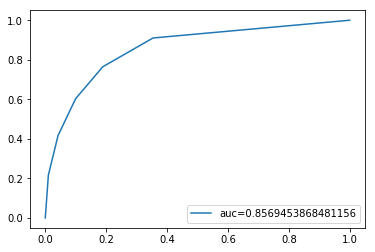

In [53]:
y_pred_proba_knn= knn.predict_proba(indep_var_test)[::,1]
fpr, tpr, _= metrics.roc_curve(dep_var_test,  y_pred_proba_knn)
auc= metrics.roc_auc_score(dep_var_test, y_pred_proba_knn)
plt.plot(fpr,tpr,label= "auc="+str(auc))
plt.legend(loc= 4)
plt.show()

In [16]:
knn_pred=knn.predict(indep_var_test)
print('Accuracy of logistic regression classifier on test set: {:.6f}'.format(knn.score(indep_var_test,dep_var_test)))

Accuracy of logistic regression classifier on test set: 0.827357


In [37]:
confusion_matrix_knn = confusion_matrix(dep_var_test, knn_pred)
print('Confusion matrix for K-nearest neighbor classifier: \n',confusion_matrix_knn)

Confusion matrix for K-nearest neighbor classifier: 
 [[10229  1131]
 [ 1469  2231]]


# Logistic Regression Classifier

In [54]:
#modelling using logistic regression
logreg= LogisticRegression(solver='lbfgs',max_iter=10000)
logreg.fit(indep_var_train,dep_var_train)

C:\Users\madhu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

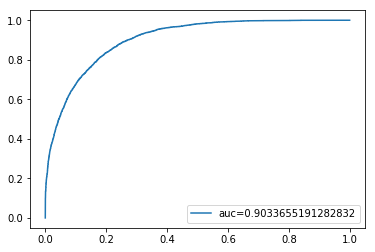

In [55]:
y_pred_proba_lr= logreg.predict_proba(indep_var_test)[::,1]
fpr, tpr, _= metrics.roc_curve(dep_var_test,  y_pred_proba_lr)
auc = metrics.roc_auc_score(dep_var_test, y_pred_proba_lr)
plt.plot(fpr,tpr,label= "auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [56]:
pred=logreg.predict(indep_var_test)

print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(logreg.score(indep_var_test,dep_var_test)))

Accuracy of logistic regression classifier on test set: 0.84814


In [57]:
confusion_matrix_lr= confusion_matrix(dep_var_test,pred)
print('Confusion matrix for logistic regression classifier: \n',confusion_matrix_lr)

Confusion matrix for logistic regression classifier: 
 [[10537   823]
 [ 1464  2236]]


# Support Vector Machine Classifier

In [49]:
#modelling svm 

svmc = SVC(kernel='rbf',gamma='auto',probability=True)
svmc.fit(indep_var_train, dep_var_train)

C:\Users\madhu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

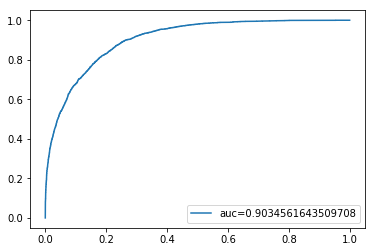

In [50]:
y_pred_proba_svm = svmc.predict_proba(indep_var_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(dep_var_test,  y_pred_proba_svm)
auc = metrics.roc_auc_score(dep_var_test, y_pred_proba_svm)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [51]:
svm_pred = svmc.predict(indep_var_test)
print('Accuracy of svm classifier on test set: {:.5f}'.format(metrics.accuracy_score(dep_var_test, svm_pred)))


Accuracy of svm classifier on test set: 0.84788


In [35]:

confusion_matrix_svm = confusion_matrix(dep_var_test,svm_pred)
print('Confusion matrix for SVM classifier: \n',confusion_matrix_svm)

Confusion matrix for SVM classifier: 
 [[10674   686]
 [ 1605  2095]]


# Random Forest Classifier

In [28]:
#modelling random forest classifier
rfc = RandomForestClassifier(n_estimators=20,random_state=0)
rfc.fit(indep_var_train, dep_var_train)

C:\Users\madhu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [29]:
rfc_pred=rfc.predict(indep_var_test)
print('Accuracy of random forest classifier on test set: {:.5f}'.format(metrics.accuracy_score(dep_var_test, rfc_pred)))


Accuracy of random forest classifier on test set: 0.84416


In [34]:
confusion_matrix_rfc= confusion_matrix(dep_var_test,svm_pred)
print('Confusion matrix for random forest classifier: \n',confusion_matrix_rfc)

Confusion matrix for random forest classifier: 
 [[10674   686]
 [ 1605  2095]]


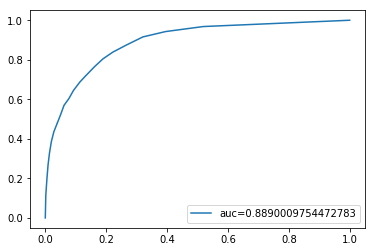

In [46]:
y_pred_proba = rfc.predict_proba(indep_var_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(dep_var_test,  y_pred_proba)
auc = metrics.roc_auc_score(dep_var_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Results

The accuracy of the logistic regression model is the highest when compared to the other models. The k-nearest neighbor classifier has the poorest performance in terms of accuracy. Here accuracy is number of correct predictions divided by total number of predictions
      

The ROC curve is plotted for all four classifiers. The area under the curve values are highest for the Support Vector Machines classifer and Logistic Regression classifier. A value closer to 1 means that the classifier distiguishes between the two classes better, namely income greater than 50k and income less than or equal to 50k. Here 